In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import accuracy_score, auc,roc_curve
from sklearn.metrics import precision_score
from sklearn import preprocessing
from sklearn import metrics
from scipy.stats import ttest_ind
import time
from datetime import date
import xgboost as xgb
from sklearn.datasets import dump_svmlight_file
from sklearn import svm
import scipy
import datetime
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import time
from sklearn.ensemble import ExtraTreesClassifier
import pylab

from sklearn.pipeline import Pipeline, FeatureUnion, make_pipeline
from sklearn.preprocessing import PolynomialFeatures,MaxAbsScaler, MinMaxScaler, FunctionTransformer, OneHotEncoder, KBinsDiscretizer
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.base import BaseEstimator,TransformerMixin
from sklearn.feature_selection import VarianceThreshold
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_extraction.text import CountVectorizer 

from sklearn.model_selection import cross_val_score, train_test_split as split

from sklearn.neighbors import KNeighborsClassifier as KNNR
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, RandomTreesEmbedding

from sklearn.linear_model import LinearRegression

from sklearn.metrics import roc_curve, mean_absolute_error, make_scorer

from geopy import distance as geodist
import random
from datetime import datetime

In [3]:
random.seed(10)
def getmingeodist(coord):
    ap1= (-34.5580305,-58.4170088)
    ap2=(-34.8150044,-58.5348284)
    ap3= (-34.6055135,-58.5989835)
    return float(min([geodist.geodesic(coord, ap1).km,geodist.geodesic(coord, ap2).km,geodist.geodesic(coord, ap3).km]))# + random.uniform(-1, 1)*0.001



def getmingeodistcc(coord):
    ap3= (-34.6052122,-58.4107299)
    return float(geodist.geodesic(coord, ap3).km)# + random.uniform(-1, 1)*0.001


In [5]:
dftr = pd.read_csv('train.csv')
df = pd.read_csv('test.csv')

tr_t1 = np.array([datetime.strptime(d, '%m/%d/%y') for d in dftr['last_review']])
te_t1 = np.array([datetime.strptime(d, '%m/%d/%y') for d in df['last_review']])

tr_t2 = tr_t1 - max(tr_t1)
te_t2 = te_t1 - max(tr_t1)

tr_t3 = -np.array([ti.days for ti in tr_t2])
dftr['last_review'] = tr_t3.astype(float)
te_t3 = -np.array([ti.days for ti in te_t2])
df['last_review'] = te_t3.astype(float)

dftr = dftr.assign(last_review_month = np.array([ti.month for ti in tr_t1]))
df = df.assign(last_review_month = np.array([ti.month for ti in te_t1]))

dftr = dftr.assign(last_review_week = np.array([ti.weekday() for ti in tr_t1]))
df = df.assign(last_review_week = np.array([ti.weekday() for ti in te_t1]))

tr_t1 = np.array([datetime.strptime(d, '%m/%d/%y') for d in dftr['host_since']])
te_t1 = np.array([datetime.strptime(d, '%m/%d/%y') for d in df['host_since']])

tr_t2 = tr_t1 - max(tr_t1)
te_t2 = te_t1 - max(tr_t1)

tr_t3 = -np.array([ti.days for ti in tr_t2])
dftr['host_since'] = tr_t3.astype(float)
te_t3 = -np.array([ti.days for ti in te_t2])
df['host_since'] = te_t3.astype(float)

## add host since month and year?
dftr = dftr.assign(host_since_month = np.array([ti.month for ti in tr_t1]))
df = df.assign(host_since_month = np.array([ti.month for ti in te_t1]))

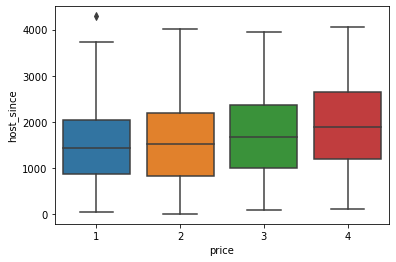

In [93]:
pl = sns.boxplot(x="price", y="host_since", data=dftr)
plt.show()

In [91]:
dftr.T

,0,1,2,3,4,5,6,7,8,9,...,9671,9672,9673,9674,9675,9676,9677,9678,9679,9680
id,727,6274,6025,8931,7524,5509,10070,1102,4510,13794,...,1367,7570,13051,3540,7412,11933,10678,13466,2931,6378
neighbourhood,Palermo,Colegiales,Recoleta,Recoleta,San Nicolás,Caballito,Núñez,Balvanera,Palermo,Constitución,...,Belgrano,Recoleta,Recoleta,Balvanera,Almagro,Puerto Madero,Monserrat,Palermo,Recoleta,Colegiales
room_type,Entire home/apt,Private room,Entire home/apt,Entire home/apt,Entire home/apt,Entire home/apt,Entire home/apt,Entire home/apt,Entire home/apt,Private room,...,Entire home/apt,Entire home/apt,Entire home/apt,Entire home/apt,Entire home/apt,Entire home/apt,Entire home/apt,Entire home/apt,Entire home/apt,Private room
minimum_nights,1,1,3,2,2,1,8,5,5,30,...,3,30,14,1,3,7,1,3,2,2
number_of_reviews,170,11,2,1,31,14,5,12,16,2,...,144,5,4,63,14,7,5,1,28,1
last_review,44,360,215,237,182,101,346,392,707,5,...,105,489,102,334,216,22,175,101,81,724
reviews_per_month,2.48,0.57,0.08,0.13,1.54,0.51,0.35,0.18,0.45,1.67,...,2.24,0.28,0.69,1.56,0.75,0.89,0.43,0.3,0.58,0.04
calculated_host_listings_count,4,1,19,1,5,1,1,58,1,1,...,2,2,2,1,4,2,1,28,1,1
availability_365,346,0,360,267,365,360,0,334,87,360,...,85,80,365,17,360,328,0,174,0,88
host_since,2492,2295,952,482,1951,1472,2081,2909,1466,855,...,2074,1633,164,1304,605,337,3273,2194,1485,1529


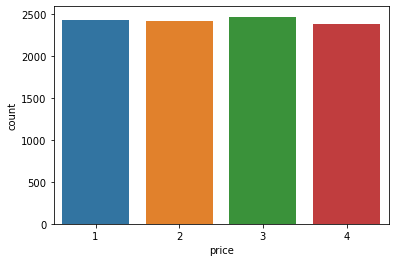

In [11]:
sns.countplot(x = 'price', data = dftr)
plt.show()

In [88]:
dftr.T

,0,1,2,3,4,5,6,7,8,9,...,9671,9672,9673,9674,9675,9676,9677,9678,9679,9680
id,727,6274,6025,8931,7524,5509,10070,1102,4510,13794,...,1367,7570,13051,3540,7412,11933,10678,13466,2931,6378
neighbourhood,Palermo,Colegiales,Recoleta,Recoleta,San Nicolás,Caballito,Núñez,Balvanera,Palermo,Constitución,...,Belgrano,Recoleta,Recoleta,Balvanera,Almagro,Puerto Madero,Monserrat,Palermo,Recoleta,Colegiales
room_type,Entire home/apt,Private room,Entire home/apt,Entire home/apt,Entire home/apt,Entire home/apt,Entire home/apt,Entire home/apt,Entire home/apt,Private room,...,Entire home/apt,Entire home/apt,Entire home/apt,Entire home/apt,Entire home/apt,Entire home/apt,Entire home/apt,Entire home/apt,Entire home/apt,Private room
minimum_nights,1,1,3,2,2,1,8,5,5,30,...,3,30,14,1,3,7,1,3,2,2
number_of_reviews,170,11,2,1,31,14,5,12,16,2,...,144,5,4,63,14,7,5,1,28,1
last_review,44,360,215,237,182,101,346,392,707,5,...,105,489,102,334,216,22,175,101,81,724
reviews_per_month,2.48,0.57,0.08,0.13,1.54,0.51,0.35,0.18,0.45,1.67,...,2.24,0.28,0.69,1.56,0.75,0.89,0.43,0.3,0.58,0.04
calculated_host_listings_count,4,1,19,1,5,1,1,58,1,1,...,2,2,2,1,4,2,1,28,1,1
availability_365,346,0,360,267,365,360,0,334,87,360,...,85,80,365,17,360,328,0,174,0,88
host_since,2492,2295,952,482,1951,1472,2081,2909,1466,855,...,2074,1633,164,1304,605,337,3273,2194,1485,1529


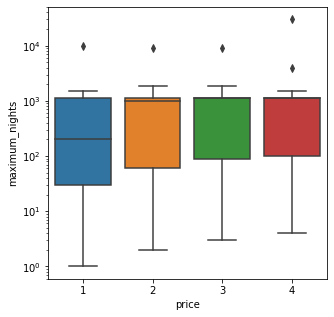

In [54]:
pl = sns.boxplot(x="price", y="maximum_nights", data=dftr)
pl.set(yscale = 'log')
fig = plt.gcf()
fig.set_size_inches(5, 5)
plt.xticks()
plt.show()

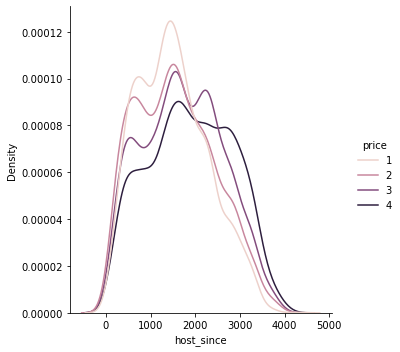

In [107]:
sns.displot(dftr, x="host_since", hue="price", kind ="kde")
plt.show()

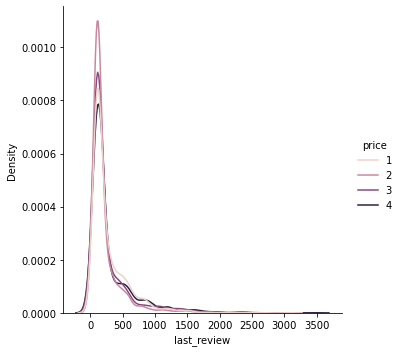

In [108]:
sns.displot(dftr, x="last_review", hue="price", kind = 'kde')

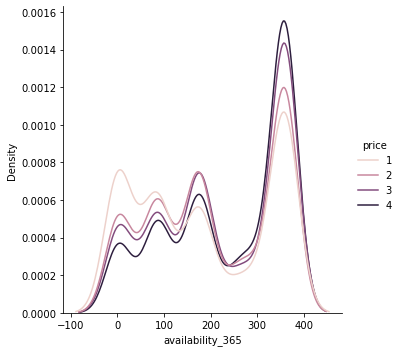

In [109]:
sns.displot(dftr, x="availability_365", hue="price", kind = 'kde')

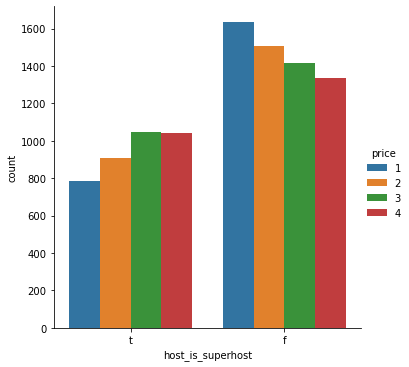

In [111]:
sns.catplot(x="host_is_superhost", hue="price", kind="count", data=dftr)
plt.show()

In [112]:
dftr.T

,0,1,2,3,4,5,6,7,8,9,...,9671,9672,9673,9674,9675,9676,9677,9678,9679,9680
id,727,6274,6025,8931,7524,5509,10070,1102,4510,13794,...,1367,7570,13051,3540,7412,11933,10678,13466,2931,6378
neighbourhood,Palermo,Colegiales,Recoleta,Recoleta,San Nicolás,Caballito,Núñez,Balvanera,Palermo,Constitución,...,Belgrano,Recoleta,Recoleta,Balvanera,Almagro,Puerto Madero,Monserrat,Palermo,Recoleta,Colegiales
room_type,Entire home/apt,Private room,Entire home/apt,Entire home/apt,Entire home/apt,Entire home/apt,Entire home/apt,Entire home/apt,Entire home/apt,Private room,...,Entire home/apt,Entire home/apt,Entire home/apt,Entire home/apt,Entire home/apt,Entire home/apt,Entire home/apt,Entire home/apt,Entire home/apt,Private room
minimum_nights,1,1,3,2,2,1,8,5,5,30,...,3,30,14,1,3,7,1,3,2,2
number_of_reviews,170,11,2,1,31,14,5,12,16,2,...,144,5,4,63,14,7,5,1,28,1
last_review,44,360,215,237,182,101,346,392,707,5,...,105,489,102,334,216,22,175,101,81,724
reviews_per_month,2.48,0.57,0.08,0.13,1.54,0.51,0.35,0.18,0.45,1.67,...,2.24,0.28,0.69,1.56,0.75,0.89,0.43,0.3,0.58,0.04
calculated_host_listings_count,4,1,19,1,5,1,1,58,1,1,...,2,2,2,1,4,2,1,28,1,1
availability_365,346,0,360,267,365,360,0,334,87,360,...,85,80,365,17,360,328,0,174,0,88
host_since,2492,2295,952,482,1951,1472,2081,2909,1466,855,...,2074,1633,164,1304,605,337,3273,2194,1485,1529


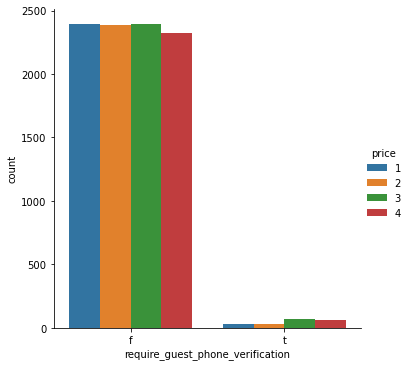

In [117]:
sns.catplot(x="require_guest_phone_verification", hue="price", kind="count", data=dftr)
plt.show()

(-500.0, 5000.0)

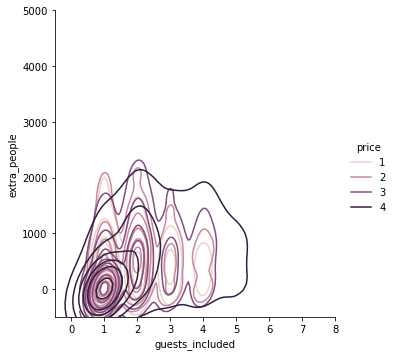

In [131]:
sns.displot(dftr, x="guests_included", y="extra_people", hue="price", kind = 'kde')
plt.xlim([-0.5,8])
plt.ylim([-500,5000])

In [132]:
random.seed(10)
def getmingeodist(coord):
    ap1= (-34.5580305,-58.4170088)
    ap2=(-34.8150044,-58.5348284)
    ap3= (-34.6055135,-58.5989835)
    return float(min([geodist.geodesic(coord, ap1).km,geodist.geodesic(coord, ap2).km,geodist.geodesic(coord, ap3).km]))# + random.uniform(-1, 1)*0.001



def getmingeodistcc(coord):
    ap3= (-34.6052122,-58.4107299)
    return float(geodist.geodesic(coord, ap3).km)# + random.uniform(-1, 1)*0.001


In [183]:
dftr = pd.read_csv('train.csv')
df = pd.read_csv('test.csv')

#df1 = df.copy()

tr_t1 = np.array([datetime.strptime(d, '%m/%d/%y') for d in dftr['last_review']])
te_t1 = np.array([datetime.strptime(d, '%m/%d/%y') for d in df['last_review']])

tr_t2 = tr_t1 - max(tr_t1)
te_t2 = te_t1 - max(tr_t1)

tr_t3 = -np.array([ti.days for ti in tr_t2])
dftr['last_review'] = tr_t3.astype(float)
te_t3 = -np.array([ti.days for ti in te_t2])
df['last_review'] = te_t3.astype(float)

dftr = dftr.assign(last_review_month = np.array([ti.month for ti in tr_t1]))
df = df.assign(last_review_month = np.array([ti.month for ti in te_t1]))

dftr = dftr.assign(last_review_week = np.array([ti.weekday() for ti in tr_t1]))
df = df.assign(last_review_week = np.array([ti.weekday() for ti in te_t1]))

tr_t1 = np.array([datetime.strptime(d, '%m/%d/%y') for d in dftr['host_since']])
te_t1 = np.array([datetime.strptime(d, '%m/%d/%y') for d in df['host_since']])

tr_t2 = tr_t1 - max(tr_t1)
te_t2 = te_t1 - max(tr_t1)

tr_t3 = -np.array([ti.days for ti in tr_t2])
dftr['host_since'] = tr_t3.astype(float)
te_t3 = -np.array([ti.days for ti in te_t2])
df['host_since'] = te_t3.astype(float)

## add host since month and year?
dftr = dftr.assign(host_since_month = np.array([ti.month for ti in tr_t1]))
df = df.assign(host_since_month = np.array([ti.month for ti in te_t1]))

#dftr = dftr.assign(host_since_week = np.array([ti.weekday() for ti in tr_t1]))
#df = df.assign(host_since_week = np.array([ti.weekday() for ti in te_t1]))

y = dftr['price']
Xtrain = dftr.drop(['price'], axis=1)
ntr = Xtrain.shape[0]

data_comp = pd.concat([Xtrain, df],axis=0,ignore_index=True, sort=False)

df1 = data_comp.copy()

df1['lat'] = 0
df1['long'] = 0
neigh_lats = pd.read_csv('neigh_long_lat.csv')
ct = 0
for index, row in neigh_lats.iterrows():
    for idx, row1 in df1.iterrows():
        if row1['neighbourhood'] == row['neighbourhood']:
            df1.loc[idx,'lat'] = float(row['latlong'].split(',')[0])
            df1.loc[idx,'long'] = float(row['latlong'].split(',')[1])
            
poidf = pd.read_csv('poi_eng.csv')

            
df1 = pd.merge(df1, poidf, left_on = 'neighbourhood', right_on = 'Neighbourhood', how = 'left').fillna(0)


dt_cols = ['host_since','last_review']
num_cols = ['minimum_nights','number_of_reviews','reviews_per_month','calculated_host_listings_count',
           'availability_365','bathrooms','bedrooms','beds','cleaning_fee', 'guests_included',
           'extra_people','maximum_nights']
nom_cols = ['host_is_superhost','instant_bookable',
            'require_guest_profile_picture','require_guest_phone_verification']
nom_neigh_col = ['neighbourhood']
torem_col = ['is_business_travel_ready']
ord_cols = ['room_type','bed_type','cancellation_policy']

cats = ['Shared room','Private room', 'Hotel room','Entire home/apt' ]
for i in range(len(cats)):
    df1['room_type'] = df1['room_type'].replace(cats[i], i)
    
cats = ['Airbed', 'Couch','Futon', 'Real Bed', 'Pull-out Sofa']
for i in range(len(cats)):
    df1['bed_type'] = df1['bed_type'].replace(cats[i], i)
    
cats = ['flexible', 'moderate', 'strict_14_with_grace_period', 'super_strict_30','super_strict_60']
for i in range(len(cats)):
    df1['cancellation_policy'] = df1['cancellation_policy'].replace(cats[i], i)

df1['acdist'] = 0
for i in df1.index:
    df1.loc[i,'acdist'] = getmingeodist((df1.loc[i,'lat'],df1.loc[i,'long']))

df1['ccdist'] = 0
for i in df1.index:
    df1.loc[i,'ccdist'] = getmingeodistcc((df1.loc[i,'lat'],df1.loc[i,'long']))


vc = df1['neighbourhood'].value_counts()
tot = df1.shape[0]
df1['neighbourhood'] = df1['neighbourhood'].apply(lambda x: vc[x])

df1 = pd.get_dummies(df1, 
               prefix = nom_cols, 
               columns = nom_cols, 
               drop_first=True, dtype = int) 



df1['no_months'] = df1['number_of_reviews']/df1['reviews_per_month']

lst = ["minimum_nights","maximum_nights","calculated_host_listings_count","no_months"]
i=len(lst)
reg = LinearRegression().fit(np.array(df1.loc[:ntr-1,lst]).reshape(-1, i), 
                             np.array(df1.loc[:ntr-1,"acdist"]).reshape(-1, 1))

nrm = reg.predict(np.array(df1.loc[:ntr-1,lst]).reshape(-1, i))
err1 = np.array(df1.loc[:ntr-1,"acdist"]).reshape(-1, 1) - nrm

nrm = reg.predict(np.array(df1.loc[ntr:,lst]).reshape(-1, i))
err2 = np.array(df1.loc[ntr:,"acdist"]).reshape(-1, 1) - nrm

#df1['acdist'] = pd.DataFrame(np.concatenate((err1,err2)))[0]**2

reg = LinearRegression().fit(np.array(df1.loc[:ntr-1,lst]).reshape(-1, i), 
                             np.array(df1.loc[:ntr-1,"ccdist"]).reshape(-1, 1))

nrm = reg.predict(np.array(df1.loc[:ntr-1,lst]).reshape(-1, i))
err1 = np.array(df1.loc[:ntr-1,"ccdist"]).reshape(-1, 1) - nrm

nrm = reg.predict(np.array(df1.loc[ntr:,lst]).reshape(-1, i))
err2 = np.array(df1.loc[ntr:,"ccdist"]).reshape(-1, 1) - nrm

#df1['ccdist'] = pd.DataFrame(np.concatenate((err1,err2)))[0]**2



In [184]:
df1.drop(torem_col + ['lat','long','Neighbourhood'] +['number_of_reviews','reviews_per_month','neighbourhood'],axis=1,inplace= True) #+['lat','long','acdist']

In [185]:
features_mean = df1.columns[1:]
X = df1.loc[0:ntr-1,features_mean]
X_test = df1.loc[ntr:,features_mean]
#X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.33, random_state=42)


In [162]:
X.T

,0,1,2,3,4,5,6,7,8,9,...,9671,9672,9673,9674,9675,9676,9677,9678,9679,9680
room_type,3.000000,1.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,1.000000,...,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,1.000000
minimum_nights,1.000000,1.000000,3.000000,2.000000,2.000000,1.000000,8.000000,5.000000,5.000000,30.000000,...,3.000000,30.000000,14.000000,1.000000,3.000000,7.000000,1.000000,3.000000,2.000000,2.000000
last_review,44.000000,360.000000,215.000000,237.000000,182.000000,101.000000,346.000000,392.000000,707.000000,5.000000,...,105.000000,489.000000,102.000000,334.000000,216.000000,22.000000,175.000000,101.000000,81.000000,724.000000
calculated_host_listings_count,4.000000,1.000000,19.000000,1.000000,5.000000,1.000000,1.000000,58.000000,1.000000,1.000000,...,2.000000,2.000000,2.000000,1.000000,4.000000,2.000000,1.000000,28.000000,1.000000,1.000000
availability_365,346.000000,0.000000,360.000000,267.000000,365.000000,360.000000,0.000000,334.000000,87.000000,360.000000,...,85.000000,80.000000,365.000000,17.000000,360.000000,328.000000,0.000000,174.000000,0.000000,88.000000
host_since,2492.000000,2295.000000,952.000000,482.000000,1951.000000,1472.000000,2081.000000,2909.000000,1466.000000,855.000000,...,2074.000000,1633.000000,164.000000,1304.000000,605.000000,337.000000,3273.000000,2194.000000,1485.000000,1529.000000
bathrooms,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.500000,...,1.000000,2.000000,2.000000,1.000000,1.000000,1.500000,2.000000,1.000000,2.000000,2.000000
bedrooms,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,...,1.000000,3.000000,3.000000,2.000000,0.000000,1.000000,2.000000,0.000000,3.000000,1.000000
beds,1.000000,1.000000,1.000000,3.000000,3.000000,1.000000,2.000000,2.000000,1.000000,1.000000,...,1.000000,4.000000,4.000000,4.000000,1.000000,1.000000,5.000000,2.000000,3.000000,1.000000
bed_type,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,...,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000


In [186]:
dfn = X
dfn['price'] =y

In [187]:
lst = dfn.columns.to_list()

In [188]:
lst

['room_type',
 'minimum_nights',
 'last_review',
 'calculated_host_listings_count',
 'availability_365',
 'host_since',
 'bathrooms',
 'bedrooms',
 'beds',
 'bed_type',
 'cleaning_fee',
 'guests_included',
 'extra_people',
 'maximum_nights',
 'cancellation_policy',
 'last_review_month',
 'last_review_week',
 'host_since_month',
 'cult',
 'food',
 'sport',
 'ent',
 'bank',
 'bar',
 'utl',
 'center',
 'house',
 'store',
 'market',
 'commute',
 'acdist',
 'ccdist',
 'host_is_superhost_t',
 'instant_bookable_t',
 'require_guest_profile_picture_t',
 'require_guest_phone_verification_t',
 'no_months',
 'price']

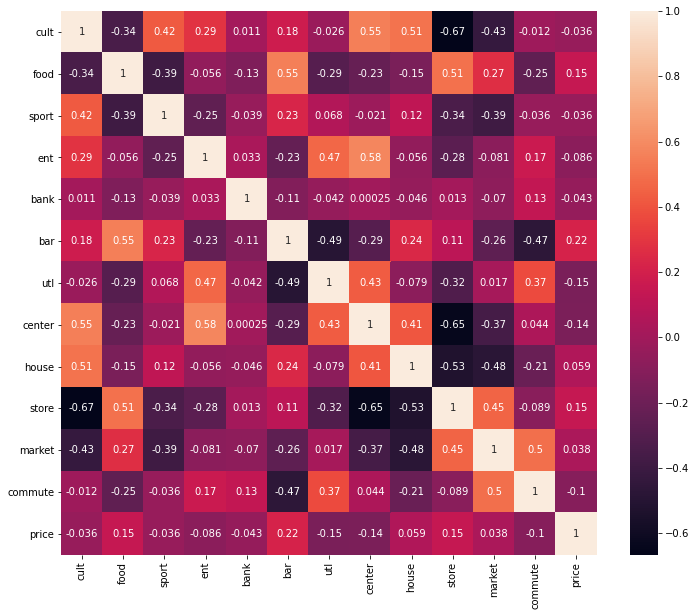

In [178]:
sns.heatmap(dfn[lst[18:30] + lst[-1:]].corr(), annot=True)
fig = plt.gcf()
fig.set_size_inches(12, 10)
plt.show()

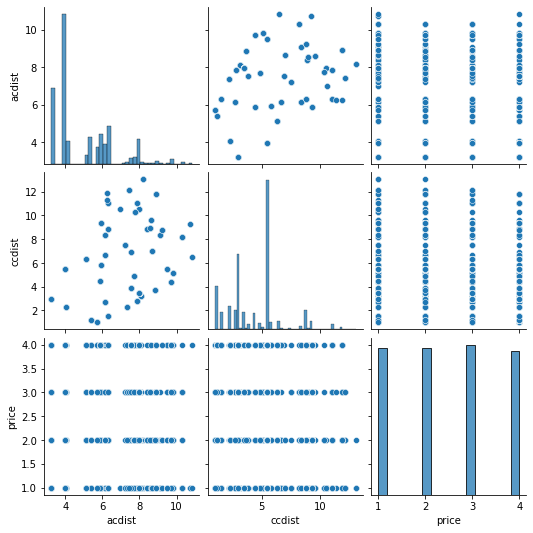

In [189]:
sns.pairplot(dfn.loc[:,lst[30:32]+lst[-1:]])
plt.show()